# 95-865: Basic Text Processing with spaCy

Author: George H. Chen (georgechen [at symbol] cmu.edu)

Let's begin by loading in the spaCy package (you have to install spaCy first, including installing spaCy's English model).

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')  # load spaCy's built-in English models

In case you want to know what the data type is of any Python object, use the `type` function:

In [2]:
type(nlp)

spacy.lang.en.English

Next, we load in the text file that we will analyze. I've copy and pasted text from the opioid epidemic Wikipedia page into "opioid_wikipedia.txt", which should be placed in the same directory as this Jupyter notebook.

In [3]:
text = open('opioid_epidemic.txt').read()  # open text file of text from opioid epidemic Wikipedia page
print(text)

The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s. Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin. The potency and availability of these substances, despite their high risk of addiction and overdose, have made them popular both as formal medical treatments and as recreational drugs. Due to their sedative effects on the part of the brain which regulates breathing, opioids in high doses present the potential for respiratory depression, and may cause respiratory failure and death.[2]

According to the U.S. Drug Enforcement Administration, "overdose deaths, particularly from prescription drugs and heroin, have reached epidemic level

In [4]:
type(text)

str

The processing that spaCy does can be done in one line:

In [5]:
parsed_text = nlp(text)

In [6]:
type(parsed_text)

spacy.tokens.doc.Doc

At this point, we can iterate through the variable `parsed_text` using a for loop. Each element of `parsed_text` is a token:

In [8]:
for token in parsed_text:
    # display the token's orthographic representation, lemma, part of speech, and entity type (which is empty if the token is not part of a named entity)
    print(token, token.lemma_, token.pos_, token.ent_type_)

The the DET 
opioid opioid ADJ 
epidemic epidemic NOUN 
or or CCONJ 
opioid opioid ADJ 
crisis crisis NOUN 
is be AUX 
the the DET 
rapid rapid ADJ 
increase increase NOUN 
in in ADP 
the the DET 
use use NOUN 
of of ADP 
prescription prescription NOUN 
and and CCONJ 
non non ADJ 
- - ADJ 
prescription prescription ADJ 
opioid opioid ADJ 
drugs drug NOUN 
in in ADP 
the the DET GPE
United United PROPN GPE
States States PROPN GPE
and and CCONJ 
Canada Canada PROPN GPE
in in ADP 
the the DET DATE
2010s 2010s NUM DATE
. . PUNCT 
Opioids opioid NOUN 
are be AUX 
a a DET 
diverse diverse ADJ 
class class NOUN 
of of ADP 
moderately moderately ADV 
strong strong ADJ 
painkillers painkiller NOUN 
, , PUNCT 
including include VERB 
oxycodone oxycodone NOUN 
( ( PUNCT 
commonly commonly ADV 
sold sell VERB 
under under ADP 
the the DET 
trade trade NOUN 
names name NOUN 
OxyContin OxyContin PROPN ORG
and and CCONJ 
Percocet Percocet PROPN ORG
) ) PUNCT 
, , PUNCT 
hydrocodone hydrocodone NOUN 


Again, you can check on some types (this following check's the type for the very last token seen):

In [9]:
type(token)

spacy.tokens.token.Token

In [10]:
token

.

In [11]:
token == '.'

TypeError: Argument 'other' has incorrect type (expected spacy.tokens.token.Token, got str)

In [12]:
token.orth_ == '.'

True

In [13]:
str(token) == '.'

True

In [14]:
token.pos_

'PUNCT'

In [15]:
token.lemma_

'.'

We can iterate through the named entities and print them out:

In [16]:
parsed_text.ents

(the United States,
 Canada,
 the 2010s,
 OxyContin,
 Percocet,
 Vicodin,
 the U.S. Drug Enforcement Administration,
 Nearly half,
 2016,
 1999 to,
 2015,
 Americans,
 two-thirds,
 2016,
 62,000,
 Americans,
 19 percent,
 2015,
 Americans,
 one year,
 Vietnam,
 Iraq,
 16,000,
 2010,
 4,000,
 1999,
 June 2017,
 over 500,000,
 the next 10 years.[11,
 March 2017,
 Larry Hogan,
 Maryland,
 July 2017,
 FDA,
 CDC,
 Thomas Frieden,
 America,
 August 10, 2017,
 Donald Trump,
 Commission,
 few weeks earlier,
 September 1,
 Trump,
 Tom Marino,
 Marino,
 the United States,
 1.1,
 1.2,
 1.3,
 Fentanyl,
 1.4,
 the United States,
 1.5,
 U.S.,
 2,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.5.2,
 2.5.3,
 3,
 4,
 5,
 Background,
 the U.S. Surgeon General,
 The Opioid Crisis,
 the 1990s,
 the United States,
 2016,
 289 million,
 the late 1990s,
 Americans,
 around 100 million,
 a third,
 U.S.,
 Between 1991 and 2011,
 U.S.,
 76 million,
 219 million,
 OxyContin,
 Percocet,
 Vicodin,
 2002,
 one,
 six,
 2012,
 one

In [17]:
for entity in parsed_text.ents:
    print(entity, entity.label_)

the United States GPE
Canada GPE
the 2010s DATE
OxyContin ORG
Percocet ORG
Vicodin ORG
the U.S. Drug Enforcement Administration ORG
Nearly half CARDINAL
2016 DATE
1999 to DATE
2015 DATE
Americans NORP
two-thirds CARDINAL
2016 DATE
62,000 CARDINAL
Americans NORP
19 percent PERCENT
2015 DATE
Americans NORP
one year DATE
Vietnam GPE
Iraq GPE
16,000 CARDINAL
2010 DATE
4,000 CARDINAL
1999 DATE
June 2017 DATE
over 500,000 CARDINAL
the next 10 years.[11 DATE
March 2017 DATE
Larry Hogan PERSON
Maryland GPE
July 2017 DATE
FDA ORG
CDC ORG
Thomas Frieden PERSON
America GPE
August 10, 2017 DATE
Donald Trump PERSON
Commission ORG
few weeks earlier DATE
September 1 DATE
Trump ORG
Tom Marino PERSON
Marino PERSON
the United States GPE
1.1 CARDINAL
1.2 CARDINAL
1.3 CARDINAL
Fentanyl PERSON
1.4 CARDINAL
the United States GPE
1.5 CARDINAL
U.S. GPE
2 CARDINAL
2.1 CARDINAL
2.2 CARDINAL
2.3 CARDINAL
2.4 CARDINAL
2.5 CARDINAL
2.5.2 CARDINAL
2.5.3 CARDINAL
3 CARDINAL
4 CARDINAL
5 CARDINAL
Background FAC
the U

In [18]:
type(entity)

spacy.tokens.span.Span

In [19]:
entity.orth_

'June 6, 2017'

In [20]:
str(entity)

'June 6, 2017'

In [21]:
entity.label_

'DATE'

We can also iterate through the sentences detected by spaCy:

In [22]:
idx = 0
for sentence in parsed_text.sents:
    print('Sentence number', idx, ':', sentence)
    idx += 1

Sentence number 0 : The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s.
Sentence number 1 : Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin.
Sentence number 2 : The potency and availability of these substances, despite their high risk of addiction and overdose, have made them popular both as formal medical treatments and as recreational drugs.
Sentence number 3 : Due to their sedative effects on the part of the brain which regulates breathing, opioids in high doses present the potential for respiratory depression, and may cause respiratory failure and death.[2]


Sentence number 4 : According to the U.S. Drug Enforcement Administr

Note that the above code can be written more concisely using Python's built-in `enumerate` function:

In [21]:
for idx, sentence in enumerate(parsed_text.sents):
    print('Sentence number', idx, ':', sentence)

Sentence number 0 : The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s.
Sentence number 1 : Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin.
Sentence number 2 : The potency and availability of these substances, despite their high risk of addiction and overdose, have made them popular both as formal medical treatments and as recreational drugs.
Sentence number 3 : Due to their sedative effects on the part of the brain which regulates breathing, opioids in high doses present the potential for respiratory depression, and may cause respiratory failure and death.[2]


Sentence number 4 : According to the U.S. Drug Enforcement Administr

Next, we build up a histogram (as a dictionary) from scratch. A key conceptual thing to be aware of is that tokens are represented as fancy objects with many attributes, and in particular, they aren't just something as simple as a string. However, for the purposes of building up the dictionary, we want to convert the tokens to strings.

In [23]:
histogram = {}
for token in parsed_text:
    original_token_text = token.orth_  # `token` itself is not a string; `token.orth_` gives the string representation of `token`
    if original_token_text not in histogram:  # if the token text is not already a key in the dictionary, create it and set its value to 1
        histogram[original_token_text] = 1
    else:  # the token text is already a key in the dictionary so increase its value by 1
        histogram[original_token_text] += 1


In [24]:
print(histogram)

{'The': 36, 'opioid': 67, 'epidemic': 19, 'or': 23, 'crisis': 15, 'is': 49, 'the': 224, 'rapid': 2, 'increase': 4, 'in': 113, 'use': 17, 'of': 152, 'prescription': 20, 'and': 142, 'non': 3, '-': 66, 'drugs': 17, 'United': 12, 'States': 9, 'Canada': 5, '2010s': 1, '.': 190, 'Opioids': 6, 'are': 26, 'a': 110, 'diverse': 1, 'class': 3, 'moderately': 1, 'strong': 3, 'painkillers': 6, ',': 476, 'including': 7, 'oxycodone': 4, '(': 34, 'commonly': 1, 'sold': 1, 'under': 5, 'trade': 1, 'names': 1, 'OxyContin': 4, 'Percocet': 2, ')': 30, 'hydrocodone': 2, 'Vicodin': 2, 'very': 1, 'painkiller': 5, 'fentanyl': 22, 'which': 26, 'synthesized': 1, 'to': 186, 'resemble': 1, 'other': 8, 'opiates': 4, 'such': 7, 'as': 34, 'opium': 1, 'derived': 1, 'morphine': 4, 'heroin': 36, 'potency': 3, 'availability': 1, 'these': 5, 'substances': 3, 'despite': 1, 'their': 13, 'high': 4, 'risk': 2, 'addiction': 21, 'overdose': 25, 'have': 14, 'made': 7, 'them': 5, 'popular': 1, 'both': 6, 'formal': 2, 'medical': 11

At this point, recall that we can also convey the information contained by a dictionary in terms of a list of tuples:

In [25]:
list(histogram.items())

[('The', 36),
 ('opioid', 67),
 ('epidemic', 19),
 ('or', 23),
 ('crisis', 15),
 ('is', 49),
 ('the', 224),
 ('rapid', 2),
 ('increase', 4),
 ('in', 113),
 ('use', 17),
 ('of', 152),
 ('prescription', 20),
 ('and', 142),
 ('non', 3),
 ('-', 66),
 ('drugs', 17),
 ('United', 12),
 ('States', 9),
 ('Canada', 5),
 ('2010s', 1),
 ('.', 190),
 ('Opioids', 6),
 ('are', 26),
 ('a', 110),
 ('diverse', 1),
 ('class', 3),
 ('moderately', 1),
 ('strong', 3),
 ('painkillers', 6),
 (',', 476),
 ('including', 7),
 ('oxycodone', 4),
 ('(', 34),
 ('commonly', 1),
 ('sold', 1),
 ('under', 5),
 ('trade', 1),
 ('names', 1),
 ('OxyContin', 4),
 ('Percocet', 2),
 (')', 30),
 ('hydrocodone', 2),
 ('Vicodin', 2),
 ('very', 1),
 ('painkiller', 5),
 ('fentanyl', 22),
 ('which', 26),
 ('synthesized', 1),
 ('to', 186),
 ('resemble', 1),
 ('other', 8),
 ('opiates', 4),
 ('such', 7),
 ('as', 34),
 ('opium', 1),
 ('derived', 1),
 ('morphine', 4),
 ('heroin', 36),
 ('potency', 3),
 ('availability', 1),
 ('these', 5),

Working with a dictionary (rather than a list of tuples) can be beneficial when we want fast access to, in this case, the specific raw count for a word of interest. For example, if we wanted to know how many times the word "opioid" appears, we can write `histogram['opioid']`, whereas if we only had the list of tuples, we would have to do a for loop over the list to find where the word `opioid` appears before we can output its count.

Representing the tokens and their counts in terms of a list of tuples is useful if we want to sort the tokens by their raw counts in decreasing order. We do this next:

In [26]:
from operator import itemgetter

sorted_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
# Some notes:
# - reverse=True tells Python to sort in reverse order, so largest to smallest rather than smallest to largest
# - itemgetter(1) says that we should sort by the 1-st entry of each tuple (recall that Python starts counting
#   from the 0th entry); here the tuples are of the form (token, raw count)
# - if you're familiar with the Python `lambda` function for creating anonymous functions, `itemgetter(1)` is
#   the same as `lambda x: x[1]`

In [27]:
sorted_token_count_pairs

[(',', 476),
 ('the', 224),
 ('.', 190),
 ('"', 188),
 ('to', 186),
 ('of', 152),
 ('\n', 152),
 (']', 143),
 ('and', 142),
 ('in', 113),
 ('a', 110),
 ('up', 89),
 ('^', 87),
 ('Jump', 87),
 ('2017', 78),
 ('opioid', 67),
 (':', 67),
 ('-', 66),
 ('for', 54),
 ('is', 49),
 ('In', 48),
 ('drug', 43),
 ('\n\n', 39),
 ('from', 38),
 ('The', 36),
 ('heroin', 36),
 ('with', 36),
 ('2016', 35),
 ('that', 35),
 ('(', 34),
 ('as', 34),
 ('by', 32),
 (')', 30),
 ('on', 30),
 ('Opioid', 30),
 ('b', 28),
 ('deaths', 27),
 ('more', 27),
 ('are', 26),
 ('which', 26),
 ('overdose', 25),
 ('was', 24),
 ('were', 24),
 ('or', 23),
 ('than', 23),
 ('March', 23),
 ('fentanyl', 22),
 ('opioids', 22),
 ('has', 22),
 ('addiction', 21),
 ('prescription', 20),
 ('U.S.', 20),
 ('Drug', 20),
 ('   ', 20),
 ('not', 20),
 ('epidemic', 19),
 ('treatment', 19),
 ('use', 17),
 ('drugs', 17),
 ('people', 17),
 ("'s", 17),
 ('CDC', 17),
 ('be', 17),
 ('Retrieved', 17),
 ('crisis', 15),
 ('June', 15),
 ('it', 15),
 ('

In [28]:
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

, : 476
the : 224
. : 190
" : 188
to : 186
of : 152

 : 152
] : 143
and : 142
in : 113
a : 110
up : 89
^ : 87
Jump : 87
2017 : 78
opioid : 67
: : 67
- : 66
for : 54
is : 49
In : 48
drug : 43


 : 39
from : 38
The : 36
heroin : 36
with : 36
2016 : 35
that : 35
( : 34
as : 34
by : 32
) : 30
on : 30
Opioid : 30
b : 28
deaths : 27
more : 27
are : 26
which : 26
overdose : 25
was : 24
were : 24
or : 23
than : 23
March : 23
fentanyl : 22
opioids : 22
has : 22
addiction : 21
prescription : 20
U.S. : 20
Drug : 20
    : 20
not : 20
epidemic : 19
treatment : 19
use : 17
drugs : 17
people : 17
's : 17
CDC : 17
be : 17
Retrieved : 17
crisis : 15
June : 15
it : 15
doctors : 15
It : 15
Addiction : 15
have : 14
their : 13
July : 13
been : 13
an : 13
they : 13
United : 12
abuse : 12
pain : 12
had : 12
Trump : 12
New : 12
medical : 11
overdoses : 11
over : 11
; : 11
addicts : 11
per : 11
can : 11
c : 11
2015 : 10
Crisis : 10
prescribed : 10
prescriptions : 10
but : 10
used : 10
about : 10
Washington : 1

You should see that the most frequently occurring tokens are punctuation or words that should be stopwords. We will look at how to remove these shortly.

A more concise way to write the code to build up the histogram is to use Python's `Counter` object. A `Counter` object is a fancier dictionary that lets you not have to explicitly account for keys that are not already in the counter. In particular, missing keys are assumed to have count 0. Moreover, it has a `most_common()` function that does the sorting for you.

In [29]:
from collections import Counter

histogram = Counter()
for token in parsed_text:
    original_token_text = token.orth_
    histogram[original_token_text] += 1
    # note: a shorter way to write the line above is: histogram[original_token_text] += 1

sorted_token_count_pairs = histogram.most_common()
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

, : 476
the : 224
. : 190
" : 188
to : 186
of : 152

 : 152
] : 143
and : 142
in : 113
a : 110
up : 89
^ : 87
Jump : 87
2017 : 78
opioid : 67
: : 67
- : 66
for : 54
is : 49
In : 48
drug : 43


 : 39
from : 38
The : 36
heroin : 36
with : 36
2016 : 35
that : 35
( : 34
as : 34
by : 32
) : 30
on : 30
Opioid : 30
b : 28
deaths : 27
more : 27
are : 26
which : 26
overdose : 25
was : 24
were : 24
or : 23
than : 23
March : 23
fentanyl : 22
opioids : 22
has : 22
addiction : 21
prescription : 20
U.S. : 20
Drug : 20
    : 20
not : 20
epidemic : 19
treatment : 19
use : 17
drugs : 17
people : 17
's : 17
CDC : 17
be : 17
Retrieved : 17
crisis : 15
June : 15
it : 15
doctors : 15
It : 15
Addiction : 15
have : 14
their : 13
July : 13
been : 13
an : 13
they : 13
United : 12
abuse : 12
pain : 12
had : 12
Trump : 12
New : 12
medical : 11
overdoses : 11
over : 11
; : 11
addicts : 11
per : 11
can : 11
c : 11
2015 : 10
Crisis : 10
prescribed : 10
prescriptions : 10
but : 10
used : 10
about : 10
Washington : 1

Now we build a histogram using only tokens that are not stop words, not punctuation, and not spaces. Moreover, what we actually add to the histogram is the lemma of a token and not the token itself.

In [30]:
from collections import Counter

histogram_with_some_filtering = Counter()
for token in parsed_text:
    lemma = token.lemma_.lower()
    # there's a part of speech 'X' that stands for "other" and consists of mostly junk
    if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
        histogram_with_some_filtering[lemma] += 1

sorted_lemma_count_pairs = histogram_with_some_filtering.most_common()
for lemma, count in sorted_lemma_count_pairs:
    print(lemma, ":", count)

opioid : 123
jump : 87
drug : 82
2017 : 78
heroin : 44
overdose : 42
prescription : 39
addiction : 36
death : 35
2016 : 35
use : 33
fentanyl : 30
treatment : 29
- : 27
crisis : 26
epidemic : 23
march : 23
u.s. : 20
abuse : 20
state : 19
doctor : 19
people : 18
cdc : 17
new : 17
retrieve : 16
increase : 15
pain : 15
june : 15
patient : 15
b : 15
july : 13
addict : 13
united : 12
medical : 12
trump : 12
report : 12
national : 12
prescribe : 12
painkiller : 11
include : 11
rate : 11
time : 11
allow : 11
c : 11
opiate : 10
2015 : 10
emergency : 10
washington : 10
states : 9
lead : 9
2010 : 9
declare : 9
1 : 9
3 : 9
user : 9
help : 9
act : 9
april : 9
13 : 9
accord : 8
americans : 8
die : 8
america : 8
buprenorphine : 8
medication : 8
find : 8
control : 8
know : 8
program : 8
post : 8
high : 7
risk : 7
war : 7
fda : 7
president : 7
2 : 7
government : 7
naloxone : 7
methadone : 7
begin : 7
2014 : 7
american : 7
white : 7
turn : 7
news : 7
15 : 7
receptor : 7
substance : 6
cause : 6
kill : 6


In [31]:
manual_stopwords = {'jump', 'b', '-', 'c'}

In [32]:
histogram_filtered_twice = Counter({lemma: count
                                    for lemma, count in histogram_with_some_filtering.items()
                                    if lemma not in manual_stopwords})

In [33]:
twice_filtered_sorted_lemma_count_pairs = histogram_filtered_twice.most_common()
for lemma, count in twice_filtered_sorted_lemma_count_pairs:
    print(lemma, ":", count)

opioid : 123
drug : 82
2017 : 78
heroin : 44
overdose : 42
prescription : 39
addiction : 36
death : 35
2016 : 35
use : 33
fentanyl : 30
treatment : 29
crisis : 26
epidemic : 23
march : 23
u.s. : 20
abuse : 20
state : 19
doctor : 19
people : 18
cdc : 17
new : 17
retrieve : 16
increase : 15
pain : 15
june : 15
patient : 15
july : 13
addict : 13
united : 12
medical : 12
trump : 12
report : 12
national : 12
prescribe : 12
painkiller : 11
include : 11
rate : 11
time : 11
allow : 11
opiate : 10
2015 : 10
emergency : 10
washington : 10
states : 9
lead : 9
2010 : 9
declare : 9
1 : 9
3 : 9
user : 9
help : 9
act : 9
april : 9
13 : 9
accord : 8
americans : 8
die : 8
america : 8
buprenorphine : 8
medication : 8
find : 8
control : 8
know : 8
program : 8
post : 8
high : 7
risk : 7
war : 7
fda : 7
president : 7
2 : 7
government : 7
naloxone : 7
methadone : 7
begin : 7
2014 : 7
american : 7
white : 7
turn : 7
news : 7
15 : 7
receptor : 7
substance : 6
cause : 6
kill : 6
public : 6
health : 6
governor 

Finally, we plot the top 20 most frequently occurring lemmas:

Text(0, 0.5, 'Raw count')

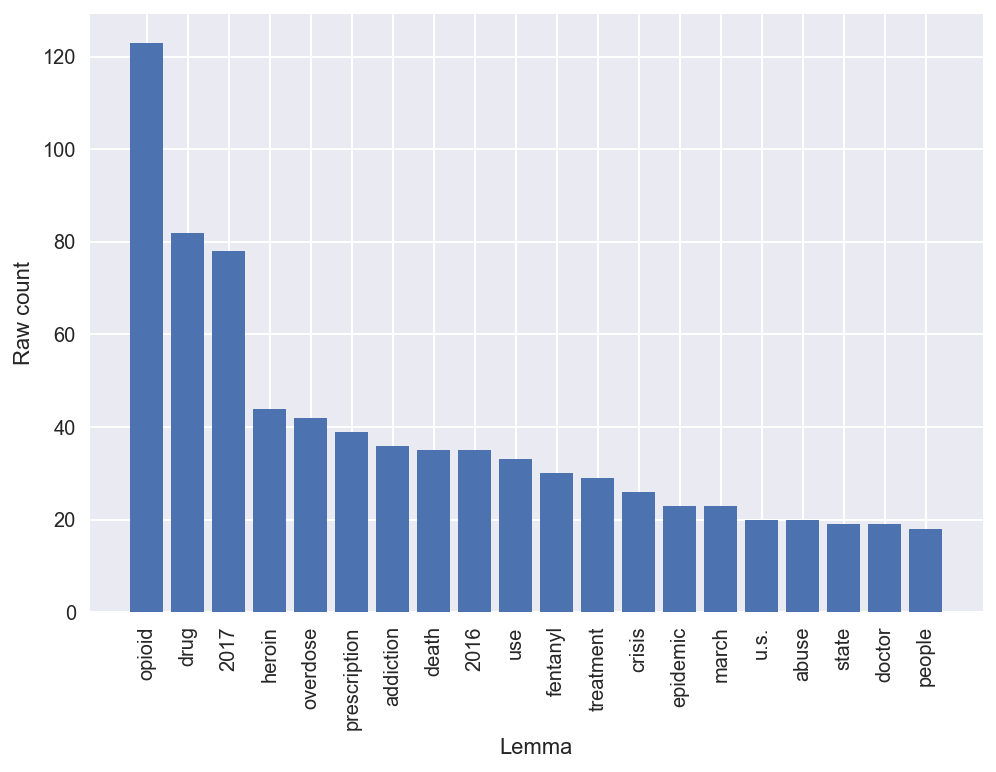

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

num_top_lemmas_to_plot = 20
top_lemmas = [lemma for lemma, count in twice_filtered_sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in twice_filtered_sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')